<a href="https://colab.research.google.com/github/YonggunJung/ICT_TensorFlow/blob/main/2023_12_3_302_YOLO_v5s_Mask_3_Classes_Github_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO_v5s Custom Dataset (3 Classes)

* https://github.com/ultralytics/yolov5

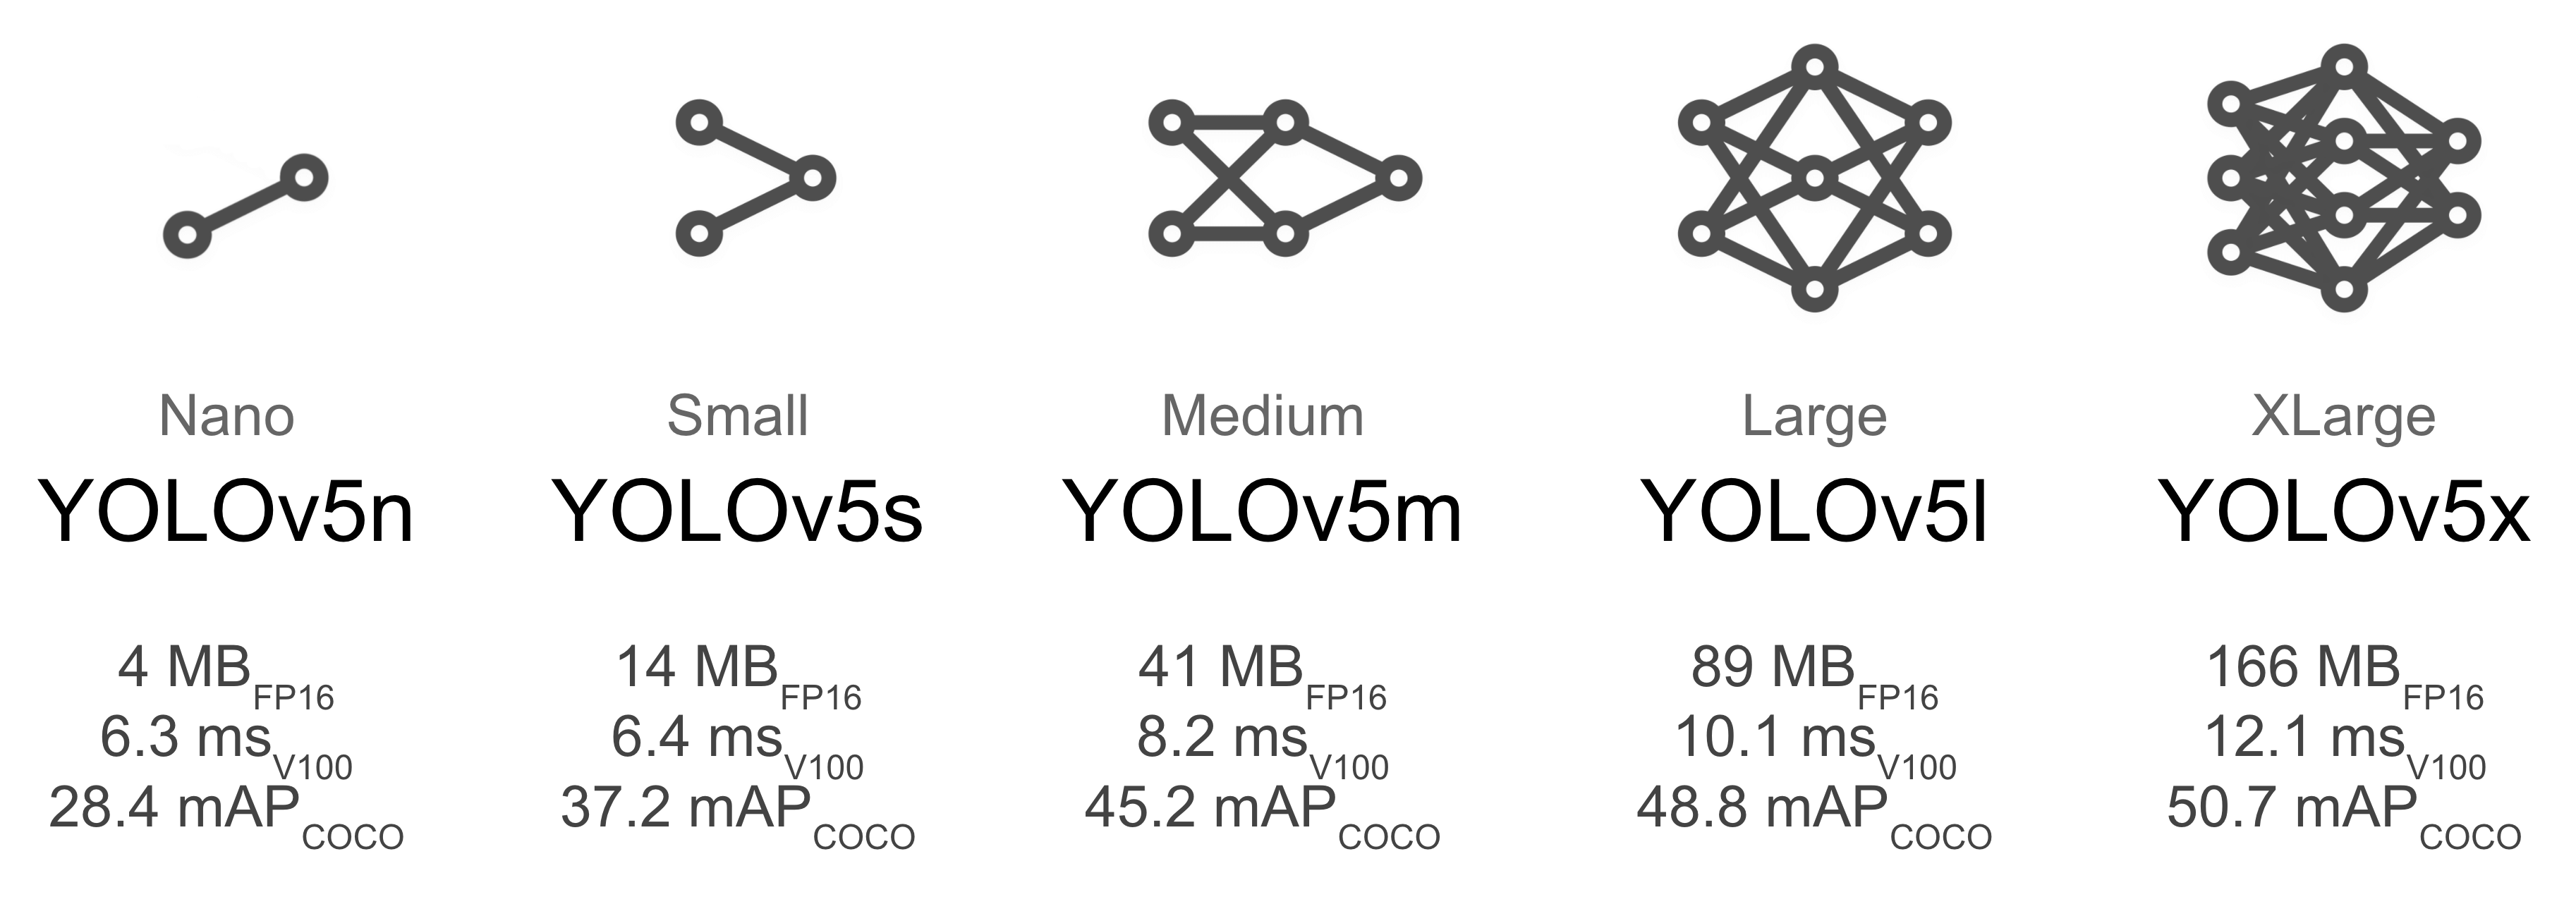

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# I. Custom Data_Set

* 3 Classes

>## 1) wget From Github

* 'maskdataset_3C.tar' 파일 다운로드

In [ ]:
!wget https://raw.githubusercontent.com/rusita-ai/pyData/master/maskdataset_3C.tara{a,b,c,d,e}

--2023-11-28 05:08:24--  https://raw.githubusercontent.com/rusita-ai/pyData/master/maskdataset_3C.taraa
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94371840 (90M) [application/octet-stream]
Saving to: ‘maskdataset_3C.taraa’

maskdataset_3C.tara 100%[===================>]  90.00M   284MB/s    in 0.3s    

2023-11-28 05:08:25 (284 MB/s) - ‘maskdataset_3C.taraa’ saved [94371840/94371840]

--2023-11-28 05:08:25--  https://raw.githubusercontent.com/rusita-ai/pyData/master/maskdataset_3C.tarab
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 94371840 (90M) [application/octet-stream]
Saving to: ‘maskdataset_3C.tarab’

maskdataset_3C.tara 100%[===================>]  90.00M   278MB/s    in 0.3s  

* 현재 작업 경로

In [ ]:
# % = 한 줄
# %% = 한 셀 전체

In [ ]:
%pwd

'/content'

* 다운로드 결과 확인

In [ ]:
!ls -l

total 408156
-rw-r--r-- 1 root root 94371840 Nov 28 05:08 maskdataset_3C.taraa
-rw-r--r-- 1 root root 94371840 Nov 28 05:08 maskdataset_3C.tarab
-rw-r--r-- 1 root root 94371840 Nov 28 05:08 maskdataset_3C.tarac
-rw-r--r-- 1 root root 94371840 Nov 28 05:08 maskdataset_3C.tarad
-rw-r--r-- 1 root root 40448000 Nov 28 05:08 maskdataset_3C.tarae
drwxr-xr-x 1 root root     4096 Nov 22 14:27 sample_data


>## 2) Unzip

In [ ]:
!cat maskdataset_3C.tar* | tar xf -

* 실행 결과 확인
 - 'yolo_custom_modeling' 디렉토리 생성

In [ ]:
!ls -l

total 408160
-rw-r--r-- 1 root root 94371840 Nov 28 05:08 maskdataset_3C.taraa
-rw-r--r-- 1 root root 94371840 Nov 28 05:08 maskdataset_3C.tarab
-rw-r--r-- 1 root root 94371840 Nov 28 05:08 maskdataset_3C.tarac
-rw-r--r-- 1 root root 94371840 Nov 28 05:08 maskdataset_3C.tarad
-rw-r--r-- 1 root root 40448000 Nov 28 05:08 maskdataset_3C.tarae
drwxr-xr-x 1 root root     4096 Nov 22 14:27 sample_data
drwxr-xr-x 3 root root     4096 Feb  2  2023 yolo_custom_modeling


# II. Train vs. Test Split

* 현재 작업 경로

In [ ]:
!pwd

/content


>## 1) Image Files

In [ ]:
from glob import glob

img_list = glob('/content/yolo_custom_modeling/dataset/images/*.png')

print(len(img_list))

843


>## 2) Label Files

In [ ]:
from glob import glob

txt_list = glob('/content/yolo_custom_modeling/dataset/labels/*.txt')

print(len(txt_list))

843


>## 3) train_test_split( )

* 8:2

In [ ]:
from sklearn.model_selection import train_test_split

train_img_list, valid_img_list = train_test_split(img_list,
                                                test_size = 0.2,
                                                random_state = 2045)

print(len(train_img_list), len(valid_img_list))

674 169


* 목록 확인

In [ ]:
print('Train_Img: ', train_img_list)
print('Valid_Img: ', valid_img_list)

Train_Img:  ['/content/yolo_custom_modeling/dataset/images/maksssksksss288.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss522.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss664.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss14.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss498.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss385.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss115.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss295.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss483.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss168.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss8.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss789.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss486.png', '/content/yolo_custom_modeling/dataset/images/maksssksksss313.png', '/content/yolo_custom_modeling/dataset

>## 4) Train.txt & Valid.txt 생성

In [ ]:
with open('/content/yolo_custom_modeling/dataset/Train.txt', 'w') as f:
  f.write('\n'.join(train_img_list) + '\n')

with open('/content/yolo_custom_modeling/dataset/Valid.txt', 'w') as f:
  f.write('\n'.join(valid_img_list) + '\n')

* 생성 확인

In [ ]:
!ls -l /content/yolo_custom_modeling/dataset/*.txt

-rw-r--r-- 1 root root 43721 Nov 28 05:08 /content/yolo_custom_modeling/dataset/Train.txt
-rw-r--r-- 1 root root 10964 Nov 28 05:08 /content/yolo_custom_modeling/dataset/Valid.txt


>## 5) data.yaml 생성

In [ ]:
yaml_text = """train: /content/yolo_custom_modeling/dataset/Train.txt
val: /content/yolo_custom_modeling/dataset/Valid.txt

nc: 3
names: ['mask', 'w_mask', 'no_mask']"""

with open('/content/yolo_custom_modeling/dataset/data.yaml', 'w') as file:
    file.write(yaml_text)

* 생성 확인

In [ ]:
%cat /content/yolo_custom_modeling/dataset/data.yaml

train: /content/yolo_custom_modeling/dataset/Train.txt
val: /content/yolo_custom_modeling/dataset/Valid.txt

nc: 3
names: ['mask', 'w_mask', 'no_mask']

# III. YOLO_v5 Configuration

* 작업 경로 설정

In [ ]:
%cd /content/yolo_custom_modeling

/content/yolo_custom_modeling


>## 1) YOLO_v5 Clone

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16078, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 16078 (delta 6), reused 9 (delta 1), pack-reused 16056
Receiving objects: 100% (16078/16078), 14.72 MiB | 8.51 MiB/s, done.
Resolving deltas: 100% (11038/11038), done.


* 작업 경로 설정

In [ ]:
%cd yolov5

/content/yolo_custom_modeling/yolov5


>## 2) Install Dependencies

In [ ]:
%pip install -qr requirements.txt

>## 3) Configuration Check

In [ ]:
import torch

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.1.0+cu118 (Tesla T4)


# IV. Model Learning

>## 1) YOLO_v5s

* yolov5s.pt
 - 약 35분

In [ ]:
%%time

!python train.py --img 640 --batch 16 --epochs 150 --data /content/yolo_custom_modeling/dataset/data.yaml --weights yolov5s.pt --cache --name mask_yolov5s_results

2023-11-28 05:09:00.082903: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-28 05:09:00.082962: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-28 05:09:00.083012: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/yolo_custom_modeling/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD

> ## 2) Object Detection 결과 확인

>### (1) Loss & mAP

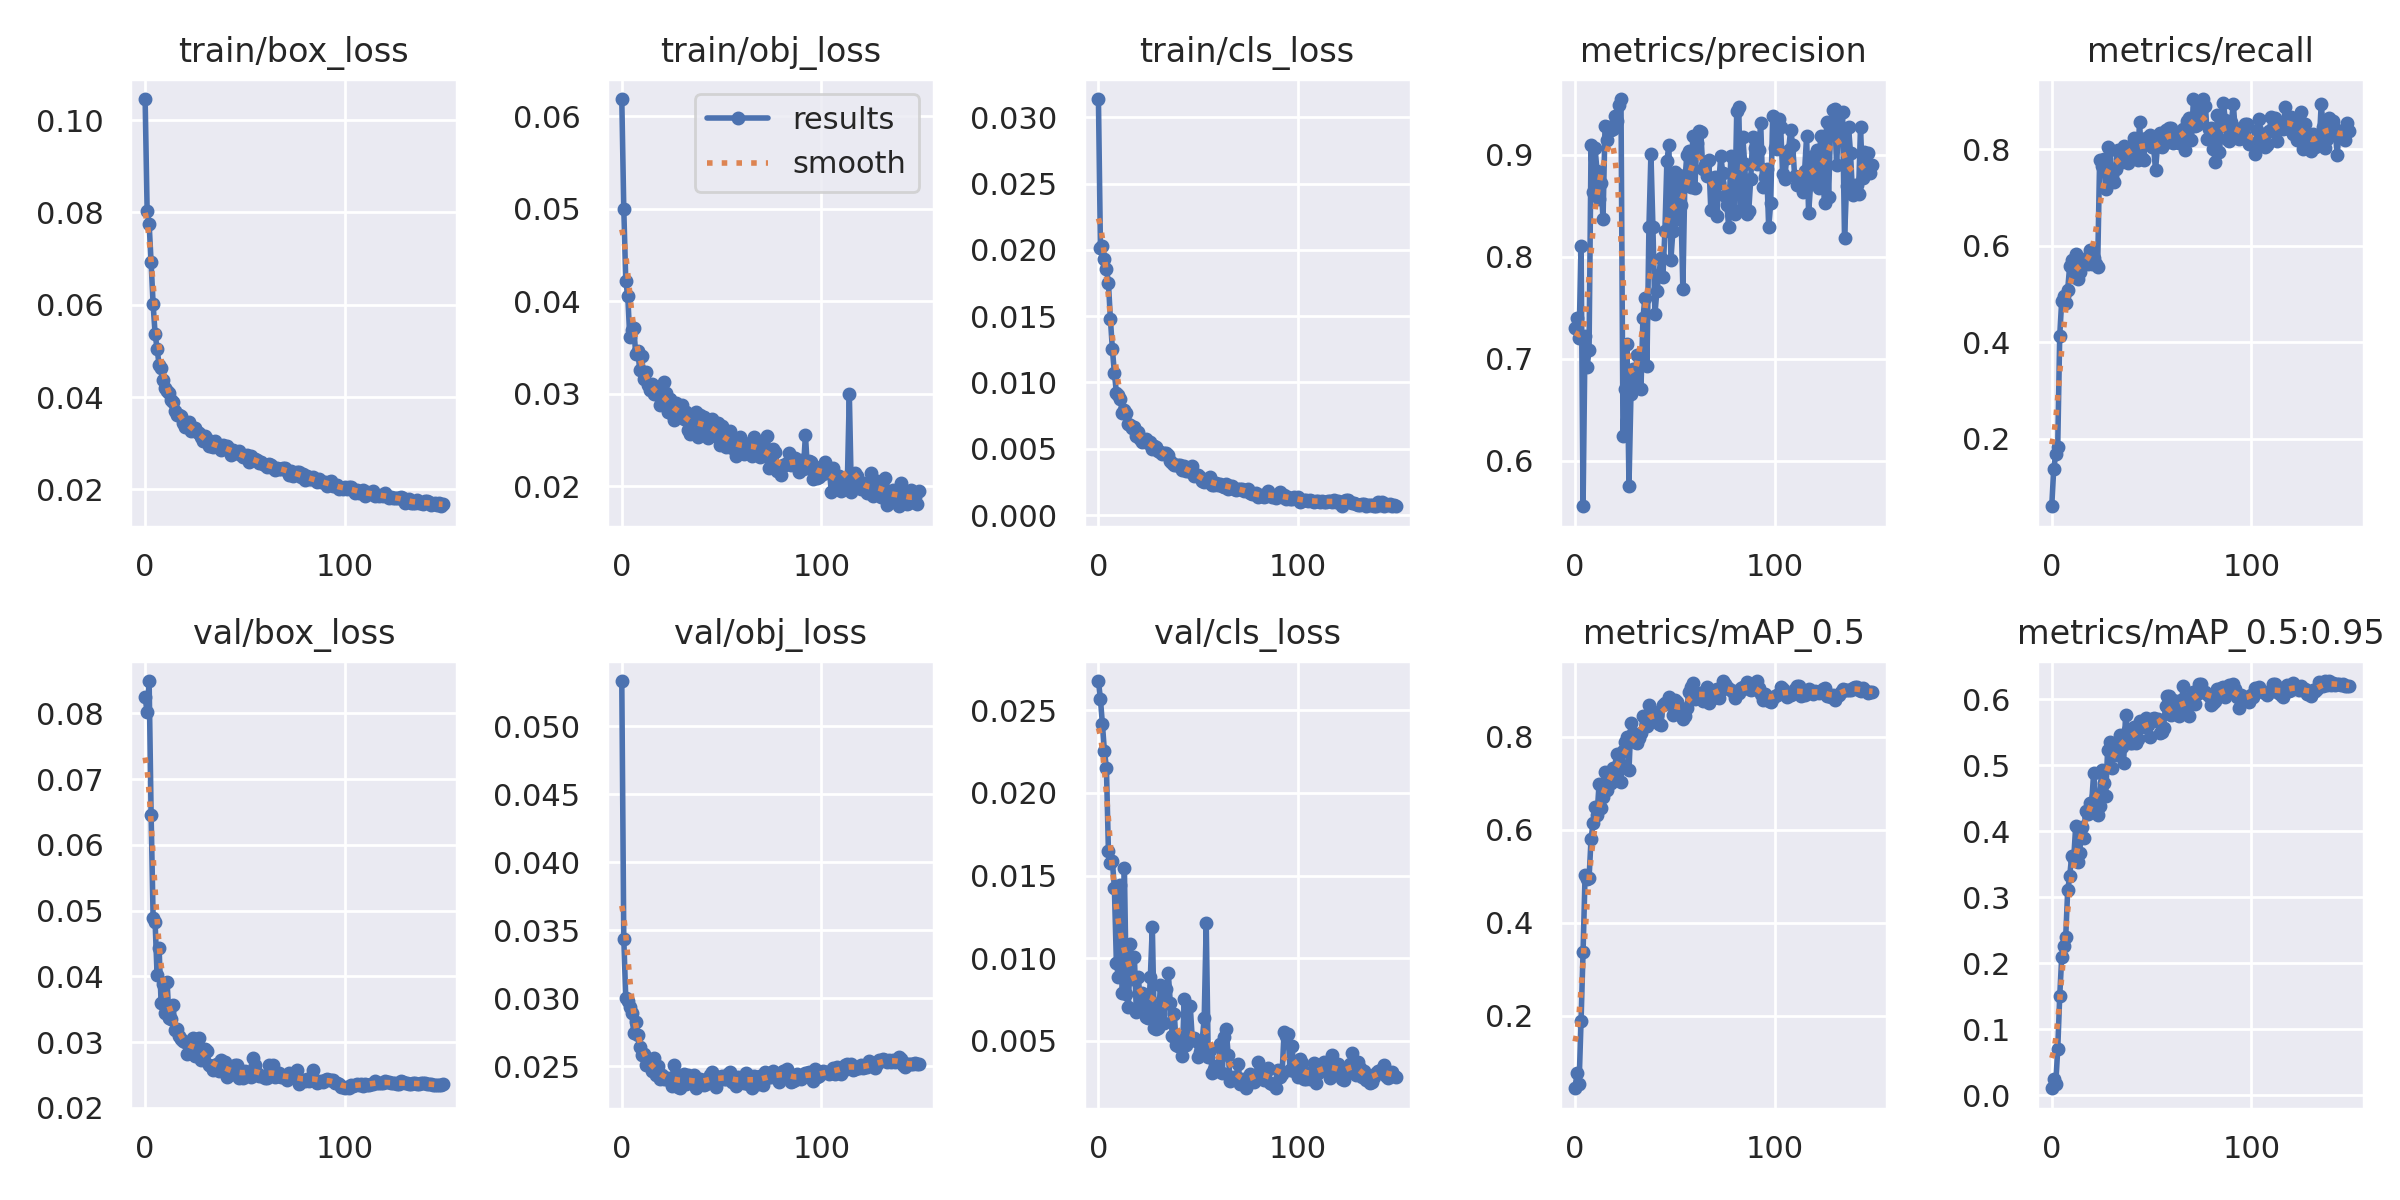

In [ ]:
from IPython.display import Image

Image('/content/yolo_custom_modeling/yolov5/runs/train/mask_yolov5s_results/results.png')

>### (2) Training Results Visualization

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolo_custom_modeling/yolov5/runs/train/mask_yolov5s_results/v*.jpg'):
    display(Image(filename=imageName))
    print("\n")

# V. Model Validation

* 현재 작업 경로

In [ ]:
!pwd

/content/yolo_custom_modeling/yolov5


>## 1) Validation 데이터에 best.pt 적용

In [ ]:
!python val.py --data /content/yolo_custom_modeling/dataset/data.yaml --img 640 --weights /content/yolo_custom_modeling/yolov5/runs/train/mask_yolov5s_results/weights/best.pt

val: data=/content/yolo_custom_modeling/dataset/data.yaml, weights=['/content/yolo_custom_modeling/yolov5/runs/train/mask_yolov5s_results/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/yolo_custom_modeling/dataset/Valid.cache... 169 images, 0 backgrounds, 0 corrupt: 100% 169/169 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 6/6 [00:07<00:00,  1.29s/it]
                   all        169        814      0.861      0.865      0.905      0.626
                  mask        1

# VI. Model Test

>## 1) Test Directory
 * --source /content/yolo_custom_modeling/dataset/test

In [ ]:
!python detect.py --source /content/yolo_custom_modeling/dataset/test --img 640 --weights /content/yolo_custom_modeling/yolov5/runs/train/mask_yolov5s_results/weights/best.pt --conf 0.5 --name Mask_Test_Image

detect: weights=['/content/yolo_custom_modeling/yolov5/runs/train/mask_yolov5s_results/weights/best.pt'], source=/content/yolo_custom_modeling/dataset/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=Mask_Test_Image, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/10 /content/yolo_custom_modeling/dataset/test/mask_test_1.png: 640x640 3 masks, 11.5ms
image 2/10 /content/yolo_custom_modeling/dataset/test/mask_test_10.png: 640x448 1 mask, 1 no_mask, 71.0ms
image 3/10 /content/yolo_custom_modeling/

>## 2) Results Visualization

In [ ]:
# display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolo_custom_modeling/yolov5/runs/detect/Mask_Test_Image/*.png'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# VII. Save Model to Google Drive

>## 1) Mount Google Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

>## 2) Model Copy to Google Drive

In [ ]:
# cp -r /content/yolov5/runs/train/mask_yolov5s_results /content/drive/MyDrive/Mask_yolov5

#
#
#
# The End
#
#
#